In [28]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from time import time

In [2]:
file_path = 'IMG_7674.JPG'

In [3]:
read_methods = [cv2.IMREAD_ANYCOLOR,
               cv2.IMREAD_ANYDEPTH,
               cv2.IMREAD_COLOR,
               cv2.IMREAD_GRAYSCALE,
               cv2.IMREAD_IGNORE_ORIENTATION,
               cv2.IMREAD_LOAD_GDAL,
               cv2.IMREAD_REDUCED_COLOR_2,
               cv2.IMREAD_REDUCED_COLOR_4,
               cv2.IMREAD_REDUCED_COLOR_8,
               cv2.IMREAD_REDUCED_GRAYSCALE_2,
               cv2.IMREAD_REDUCED_GRAYSCALE_4,
               cv2.IMREAD_REDUCED_GRAYSCALE_8,
               cv2.IMREAD_UNCHANGED]

In [4]:
read_images = list()
for i in read_methods:
    read_images.append(cv2.imread(file_path,i))

(500, 750, 3)
(500, 750)
(500, 750, 3)
(500, 750)
(500, 750)
(500, 750, 3)
(250, 375, 3)
(125, 188, 3)
(63, 94, 3)
(250, 375)
(125, 188)
(63, 94)
(500, 750, 3)


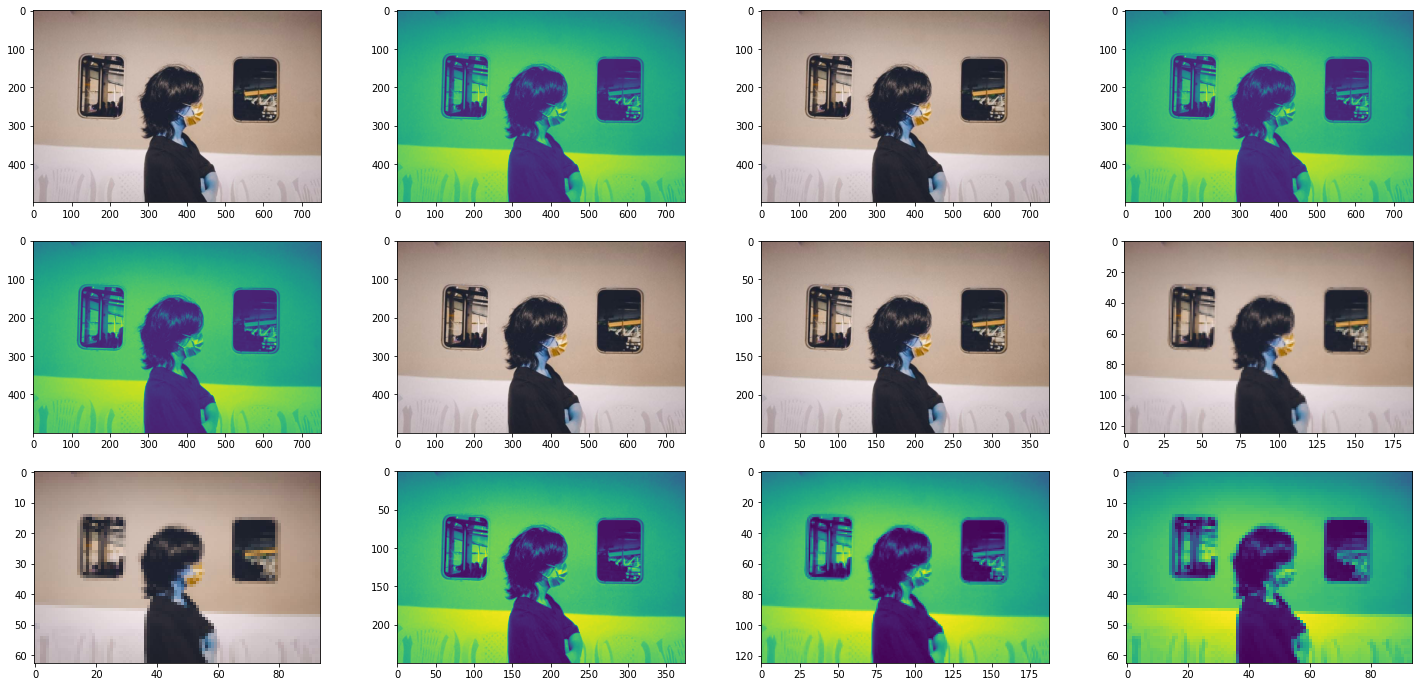

In [5]:
fig, axes = plt.subplots(nrows=3,ncols=4, figsize=(25, 12))
#fig.tight_layout()

for i in range(4):
    axes[0][i].imshow(read_images[i])
    axes[1][i].imshow(read_images[i+4])
    axes[2][i].imshow(read_images[i+8])

for j in read_images:
    print(j.shape)

methods                | pixel and channels 
-------                |         -------
cv2.IMREAD_ANYCOLOR            | (500, 750, 3)
cv2.IMREAD_ANYDEPTH            | (500, 750)   
cv2.IMREAD_COLOR               | (500, 750, 3) 
cv2.IMREAD_GRAYSCALE           | (500, 750)   
cv2.IMREAD_IGNORE_ORIENTATION  | (500, 750)   
cv2.IMREAD_LOAD_GDAL           | (500, 750, 3)
cv2.IMREAD_REDUCED_COLOR_2     | (250, 375, 3)
cv2.IMREAD_REDUCED_COLOR_4     | (125, 188, 3)
cv2.IMREAD_REDUCED_COLOR_8     | (63, 94, 3)  
cv2.IMREAD_REDUCED_GRAYSCALE_2 | (250, 375)   
cv2.IMREAD_REDUCED_GRAYSCALE_4 | (125, 188)   
cv2.IMREAD_REDUCED_GRAYSCALE_8 | (63, 94)     
cv2.IMREAD_UNCHANGED           | (500, 750, 3)

What if I want to know every elements of any array is same ? 

In [6]:
print((read_images[0] == read_images[2]).all())

True


In [7]:
same_pixel_ones = [read_images[0],read_images[2], read_images[5], read_images[12]]

In [8]:
print((same_pixel_ones[0] == same_pixel_ones[1]).all())
print((same_pixel_ones[1] == same_pixel_ones[2]).all())
print((same_pixel_ones[2] == same_pixel_ones[3]).all())

True
True
True


In [9]:
gray_same_px_ones = [read_images[1], read_images[3], read_images[4]]

In [12]:
print((gray_same_px_ones[0]==gray_same_px_ones[1]).all())
print((gray_same_px_ones[1]==gray_same_px_ones[2]).all())

True
True


[In OpenCV (Python), why am I getting 3 channel images from a grayscale image?](https://stackoverflow.com/a/18871394/10582082)

(500, 750)


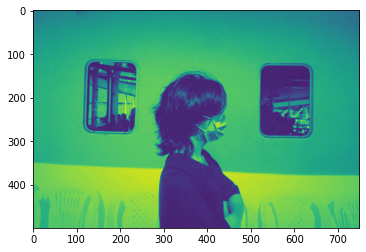

In [14]:
# imageGrayMode = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(read_images[3])
print(read_images[3].shape)

(500, 750, 3)


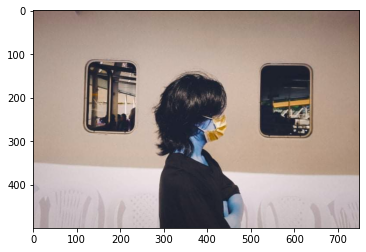

In [25]:
# imageColorMode = cv2.imread(file_path, cv2.IMREAD_COLOR)
plt.imshow(read_images[2])
print(read_images[2].shape)

In [27]:
# plt.imshow(cv2.cvtColor(imageColorMode, cv2.COLOR_BGR2RGB))

__cv2.CV_LOAD_IMAGE_GRAYSCALE vs cv2.IMREAD_GRAYSCALE__
---

In [59]:
def load(img_path_color):
    fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(10, 5))
    fig.tight_layout()
    time_1 = time()
    img_read_as_gray = cv2.imread(img_path_color, cv2.IMREAD_GRAYSCALE)
    print('read time: ', str(time()-time_1))
    time_2 = time()
    axes[0].imshow(img_read_as_gray)
    print('write time: ', str(time()-time_2))
    time_3 = time()
    cv2.imwrite('as_gray.jpg', img_read_as_gray)
    print('disk write time: ', str(time()-time_3))
    print('total time: ', str(time()-time_1))
    print("")
    time_1 = time()
    img_read_as_color = cv2.cvtColor(cv2.imread(img_path_color),cv2.COLOR_BGR2GRAY)
    print('read time: ', str(time()-time_1))
    time_2 = time()
    axes[1].imshow(img_read_as_color)
    print('write time: ', str(time()-time_2))
    time_3 = time()
    cv2.imwrite('as_color.jpg', img_read_as_color)
    print('disk write time: ', str(time()-time_3))
    print('total time: ', str(time()-time_1))

read time:  0.038979291915893555
write time:  0.012439966201782227
disk write time:  0.05630946159362793
total time:  0.1082162857055664

read time:  0.08834552764892578
write time:  0.012949228286743164
disk write time:  0.054912567138671875
total time:  0.15648984909057617


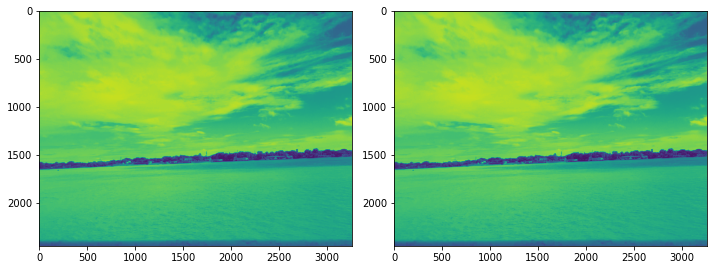

In [60]:
load('IMG_7620.JPG')

read time:  0.059664011001586914
write time:  0.011904716491699219
disk write time:  0.060295820236206055
total time:  0.1322340965270996

read time:  0.08771395683288574
write time:  0.011673688888549805
disk write time:  0.05732560157775879
total time:  0.1572871208190918


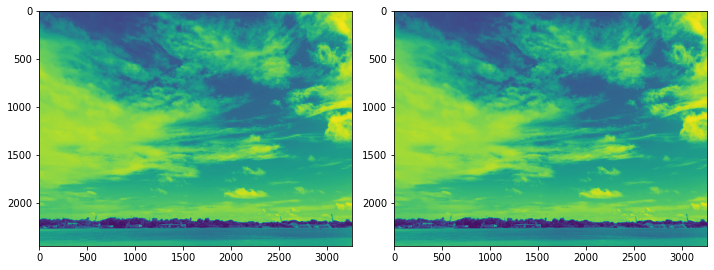

In [61]:
load('IMG_7621.JPG')

read time:  0.0378117561340332
write time:  0.011891841888427734
disk write time:  0.05531668663024902
total time:  0.10528230667114258

read time:  0.05364680290222168
write time:  0.01096034049987793
disk write time:  0.05591320991516113
total time:  0.1207878589630127


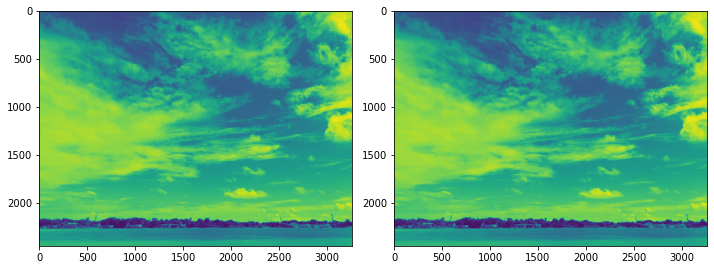

In [62]:
load('as_gray_org.jpg')

read time:  0.05214571952819824
write time:  0.010907888412475586
disk write time:  0.05542325973510742
total time:  0.1187283992767334

read time:  0.05335807800292969
write time:  0.011187553405761719
disk write time:  0.05629992485046387
total time:  0.12130999565124512


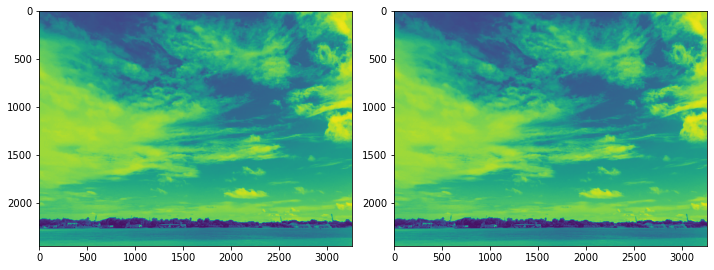

In [63]:
load('as_color_org.jpg')

read image context
---

In [73]:
def load_pixel(img_path_color):
    fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(15, 5))
    fig.tight_layout()

    time_1 = time()
    img_read_as_gray = cv2.imread(img_path_color, cv2.IMREAD_GRAYSCALE)
    print('read time: ', str(time()-time_1))
    time_2 = time()
    axes[0].imshow(img_read_as_gray)
    print('write time: ', str(time()-time_2))
    time_3 = time()
    cv2.imwrite('gray.jpg', img_read_as_gray)
    print('disk write time: ', str(time()-time_3))
    print('total time: ', str(time()-time_1))
    
    time_1 = time()
    img_read_as_gray_2 = cv2.imread(img_path_color, cv2.IMREAD_REDUCED_GRAYSCALE_2)
    print('read time: ', str(time()-time_1))
    time_2 = time()
    axes[1].imshow(img_read_as_gray_2)
    print('write time: ', str(time()-time_2))
    time_3 = time()
    cv2.imwrite('gray_2.jpg', img_read_as_gray_2)
    print('disk write time: ', str(time()-time_3))
    print('total time: ', str(time()-time_1))
    
    time_1 = time()
    img_read_as_gray_4 = cv2.imread(img_path_color, cv2.IMREAD_REDUCED_GRAYSCALE_4)
    print('read time: ', str(time()-time_1))
    time_2 = time()
    axes[2].imshow(img_read_as_gray_4)
    print('write time: ', str(time()-time_2))
    time_3 = time()
    cv2.imwrite('gray_4.jpg', img_read_as_gray_4)
    print('disk write time: ', str(time()-time_3))
    print('total time: ', str(time()-time_1))

read time:  0.04090547561645508
write time:  0.011520624160766602
disk write time:  0.05570173263549805
total time:  0.10840725898742676
read time:  0.026792526245117188
write time:  0.003400087356567383
disk write time:  0.014590740203857422
total time:  0.044928550720214844
read time:  0.022546052932739258
write time:  0.0017697811126708984
disk write time:  0.003845691680908203
total time:  0.028448104858398438


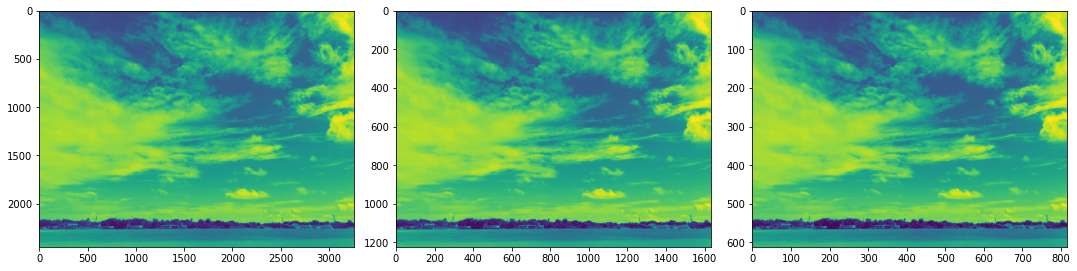

In [74]:
load_pixel('IMG_7621.JPG')

In [50]:
images = list()
manipulations = {'color':cv2.IMREAD_COLOR,
                'gray':cv2.IMREAD_GRAYSCALE,
                'cvt_color_rgb':cv2.COLOR_BGR2RGB}

image = cv2.imread(file_path)
images.append(image)
read_img_gray_mode = cv2.imread(file_path, manipulations['gray'])
images.append(read_img_gray_mode)
read_img_color_mode = cv2.imread(file_path, manipulations['color'])
images.append(read_img_color_mode)
gray_img_rgb = cv2.cvtColor(read_img_gray_mode, manipulations['cvt_color_rgb'])
images.append(gray_img_rgb)
color_img_rgb = cv2.cvtColor(read_img_color_mode, manipulations['cvt_color_rgb'])
images.append(color_img_rgb)

In [55]:
len(images)

5

Text(0.5, 1.0, 'read as color and cvt rgb')

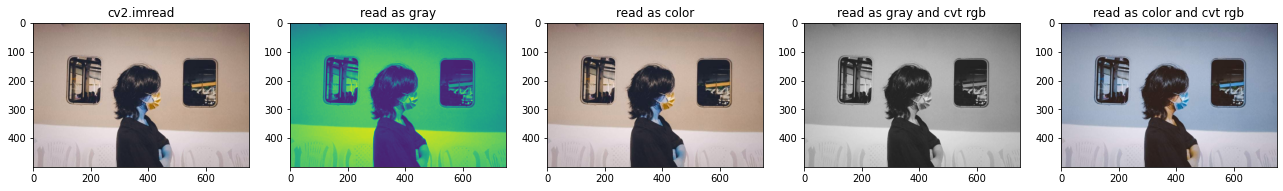

In [78]:
fig, axes = plt.subplots(nrows=1,ncols=len(images), figsize=(18, 5))
fig.tight_layout()
j = 0
for i in images:
    axes[j].imshow(i)
    j+=1
    
axes[0].set_title('cv2.imread')
axes[1].set_title('read as gray')
axes[2].set_title('read as color')
axes[3].set_title('read as gray and cvt rgb')
axes[4].set_title('read as color and cvt rgb')

(500, 750)


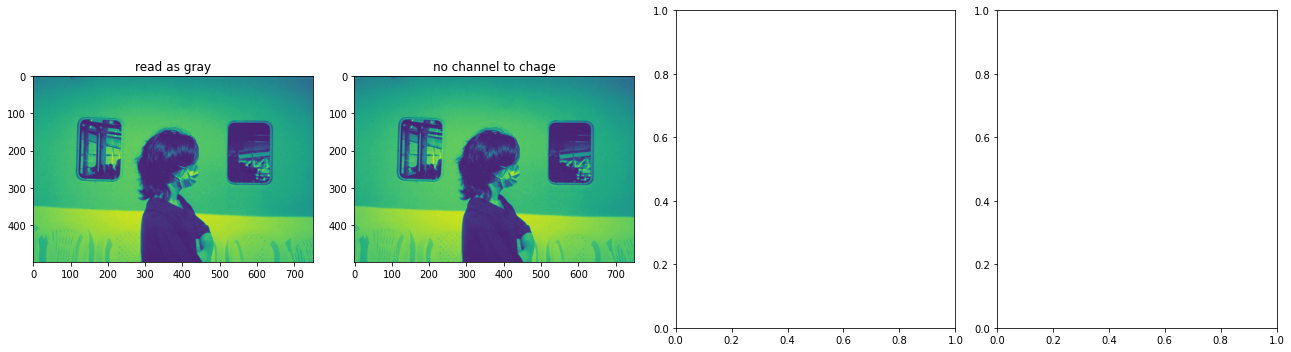

In [96]:
fig, axes = plt.subplots(nrows=1,ncols=4, figsize=(18, 5))
fig.tight_layout()
axes[0].imshow(images[1])
j = 1
for i in cv2.split(images[1]):
    axes[j].imshow(i)
    j+=1
    
axes[0].set_title('read as gray')
axes[1].set_title('no channel to chage')
print(images[1].shape)

(500, 750, 3)


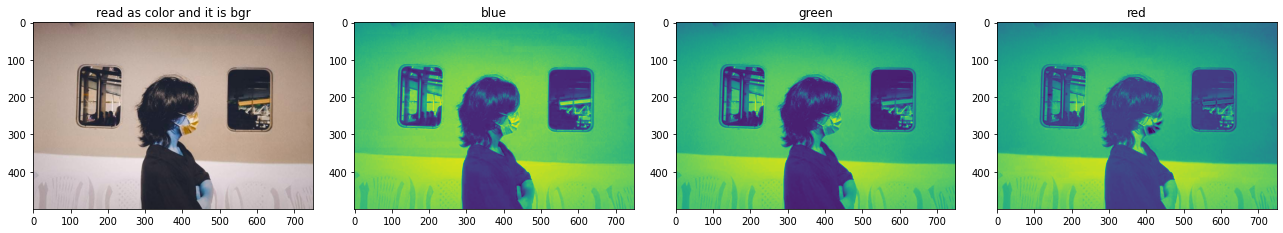

In [106]:
fig, axes = plt.subplots(nrows=1,ncols=4, figsize=(18, 5))
fig.tight_layout()
axes[0].imshow(images[2])
j = 1
for i in cv2.split(images[2]):
    axes[j].imshow(i)
    j+=1
    
axes[0].set_title('read as color and it is bgr')
axes[1].set_title('blue')
axes[2].set_title('green')
axes[3].set_title('red')
print(images[2].shape)

(500, 750, 3)


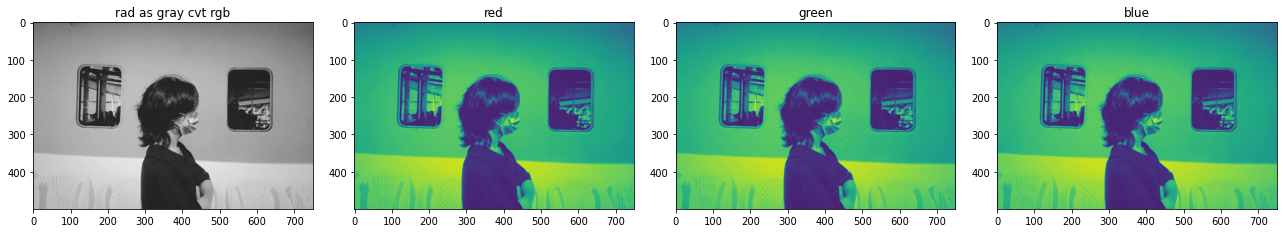

In [105]:
fig, axes = plt.subplots(nrows=1,ncols=4, figsize=(18, 5))
fig.tight_layout()
axes[0].imshow(images[3])
j = 1
for i in cv2.split(images[3]):
    axes[j].imshow(i)
    j+=1
    
axes[0].set_title('read as gray and cvt rgb')
axes[1].set_title('red')
axes[2].set_title('green')
axes[3].set_title('blue')
print(images[3].shape)

(500, 750, 3)


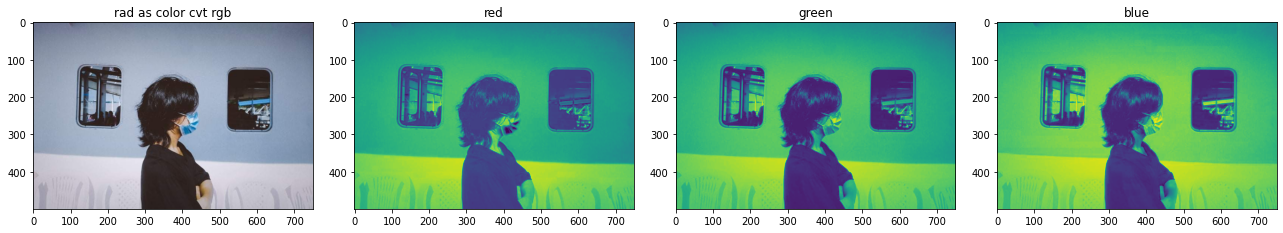

In [104]:
fig, axes = plt.subplots(nrows=1,ncols=4, figsize=(18, 5))
fig.tight_layout()
axes[0].imshow(images[4])
j = 1
for i in cv2.split(images[4]):
    axes[j].imshow(i)
    j+=1
    
axes[0].set_title('read as color and cvt rgb')
axes[1].set_title('red')
axes[2].set_title('green')
axes[3].set_title('blue')
print(images[4].shape)

## Read as color mode VS convert to RGB

(500, 750, 3)


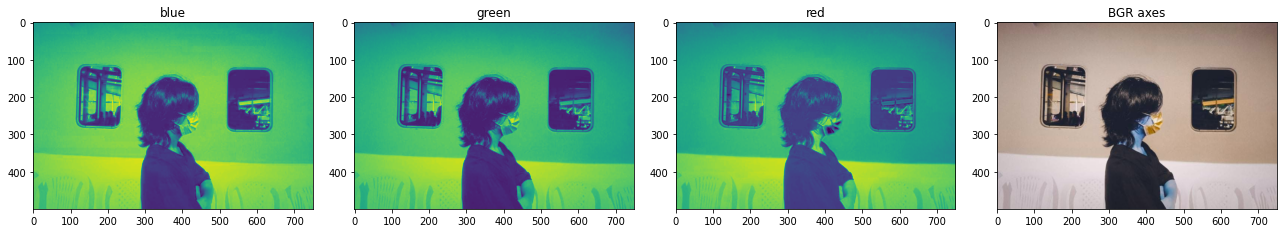

In [107]:
fig, axes = plt.subplots(nrows=1,ncols=4, figsize=(18, 5))
fig.tight_layout()
axes[3].imshow(images[2])
j = 0
for i in cv2.split(images[2]):
    axes[j].imshow(i)
    j+=1

axes[0].set_title('blue')
axes[1].set_title('green')
axes[2].set_title('red')
axes[3].set_title('BGR axes')
print(images[2].shape)

(500, 750, 3)


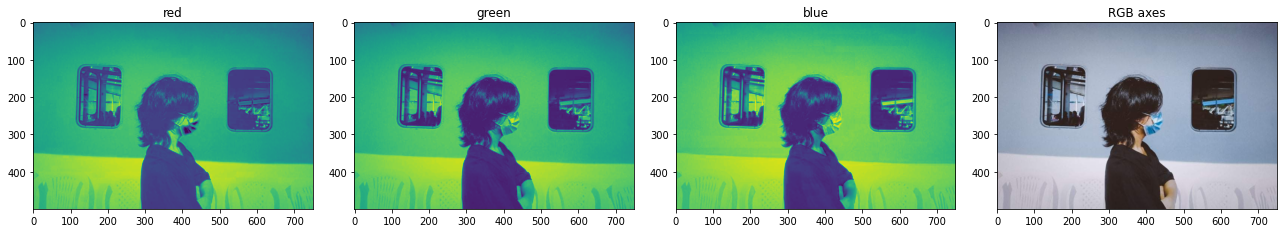

In [109]:
fig, axes = plt.subplots(nrows=1,ncols=4, figsize=(18, 5))
fig.tight_layout()
axes[3].imshow(images[4])
j = 0
for i in cv2.split(images[4]):
    axes[j].imshow(i)
    j+=1

axes[0].set_title('red')
axes[1].set_title('green')
axes[2].set_title('blue')
axes[3].set_title('RGB axes')
print(images[2].shape)

### What if I want to work with dirty stuff in context ?

In [110]:
b = images[2][:,:,0]
g = images[2][:,:,1]
r = images[2][:,:,2]

(500, 750, 3)


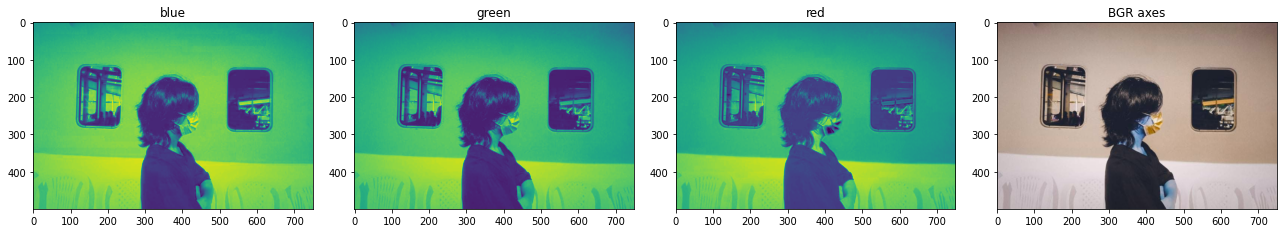

In [112]:
fig, axes = plt.subplots(nrows=1,ncols=4, figsize=(18, 5))
fig.tight_layout()
axes[3].imshow(images[2])
axes[3].set_title('BGR axes')

axes[0].imshow(b)
axes[0].set_title('blue')
axes[1].imshow(g)
axes[1].set_title('green')
axes[2].imshow(r)
axes[2].set_title('red')

print(images[2].shape)

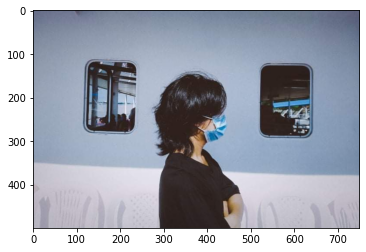

In [127]:
rgb_stack = np.dstack((r,g,b))
plt.imshow(rgb_stack)

# m' interesting in gray images
so..

In [114]:
gray_ones = list()
gray_ones.append(images[1])
gray_ones.append(images[3])

In [116]:
gray_ones[0].shape

(500, 750)

In [117]:
gray_ones[1].shape

(500, 750, 3)

Text(0.5, 1.0, '(500, 750, 3)')

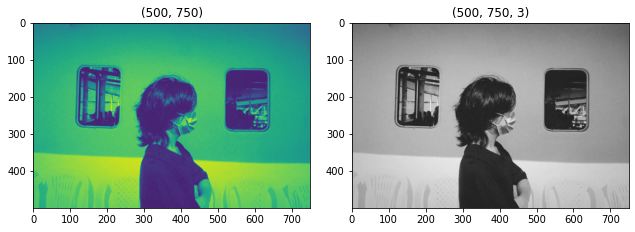

In [124]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(9, 3.5))
fig.tight_layout()
axes[0].imshow(gray_ones[0])
axes[0].set_title(gray_ones[0].shape)

axes[1].imshow(gray_ones[1])
axes[1].set_title(gray_ones[1].shape)

as you can see left image, it has only one channel and seem to be insaned but it has been said as gray not gay!

right one is three channel and we can see it is a gray scaled, 

actually I have converted left one to right one by `cv2.cvtColor`

so question is, why there was seen to be created any other two channels when I converted one channel insane gray scaled image to the right one?

interesting... let's split the right one out as it has 3 channels

In [128]:
cv_r, cv_g, cv_b = cv2.split(gray_ones[1]) # because I have applied cvtColor to RGB on gray image,so the gray image will be sorted as R G B.

Text(0.5, 1.0, 'blue')

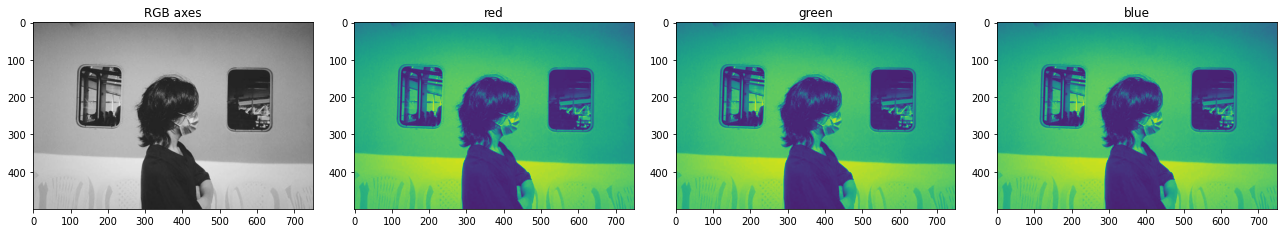

In [145]:
fig, axes = plt.subplots(nrows=1,ncols=4, figsize=(18, 5))
fig.tight_layout()
axes[0].imshow(gray_ones[1])
axes[0].set_title('RGB axes')

axes[1].imshow(cv_r)
axes[1].set_title('red')
axes[2].imshow(cv_g)
axes[2].set_title('green')
axes[3].imshow(cv_b)
axes[3].set_title('blue')

In [143]:
insane_ones = np.zeros((500,750,3), 'uint8')
insane_ones[...,0] = gray_ones[0]
insane_ones[...,1] = gray_ones[0]
insane_ones[...,2] = gray_ones[0]

Text(0.5, 1.0, 'unknown')

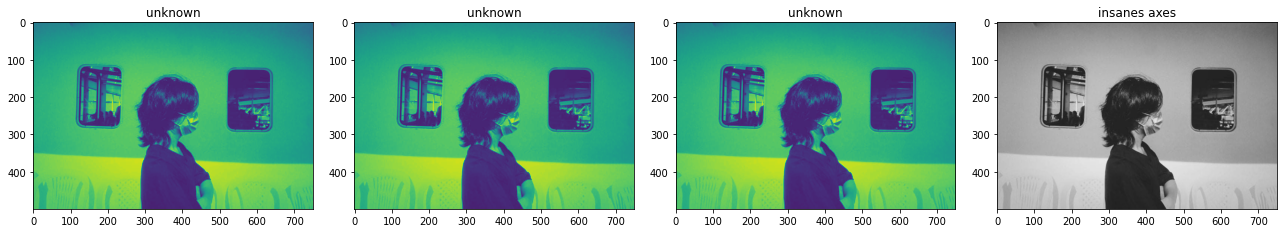

In [149]:
fig, axes = plt.subplots(nrows=1,ncols=4, figsize=(18, 5))
fig.tight_layout()
axes[3].imshow(insane_ones)
axes[3].set_title('insanes axes')

axes[0].imshow(gray_ones[0])
axes[0].set_title('unknown')
axes[1].imshow(gray_ones[0])
axes[1].set_title('unknown')
axes[2].imshow(gray_ones[0])
axes[2].set_title('unknown')

## what is unit8 ?

In [153]:
np.amax(gray_ones[1])

248

In [154]:
index_one_in_gray_ones = gray_ones[1].copy()

In [157]:
np.amax(index_one_in_gray_ones)

248

In [158]:
index_one_in_gray_ones = index_one_in_gray_ones/255

In [159]:
np.amax(index_one_in_gray_ones)

0.9725490196078431

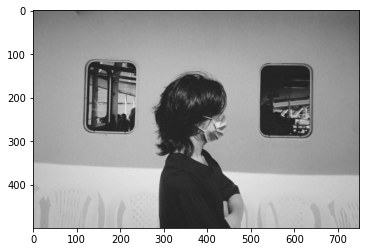

In [160]:
plt.imshow(index_one_in_gray_ones)

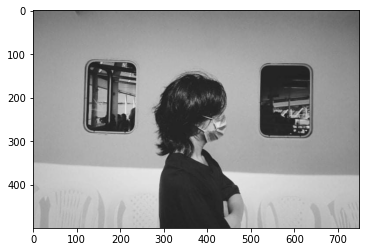

In [162]:
plt.imshow(gray_ones[1])

https://www.youtube.com/watch?v=WNeJua8TMWA